Template for daily nowcast figure generation.

# Salish Sea NEMO Model Daily Nowcast Figures

# Set-up

In [1]:
import datetime
from glob import glob
import os

from IPython.core.display import HTML
import netCDF4 as nc

from nowcast.figures import figures
from nowcast.figures.publish import pt_atkinson_tide
from nowcast.figures.publish import compare_tide_prediction_max_ssh

import scipy.io as sio

%matplotlib inline

/home/sallen/anaconda/envs/nowcast-fig-dev/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])

In [3]:
run_date = datetime.date.today()
run_date = datetime.datetime(2017, 8, 24)
# Results dataset location
results_home = '/results/SalishSea/nowcast-green/'
results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())

Load the results datasets:

In [4]:
grid_T_hr = results_dataset('1h', 'grid_T', results_dir)
grid_T_dy = results_dataset('1d', 'grid_T', results_dir)
grid_U_dy = results_dataset('1d', 'grid_U', results_dir)
grid_V_dy = results_dataset('1d', 'grid_V', results_dir)

Set lots of paths etc

In [5]:
bathy = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [6]:
tidal_predictions = '/results/nowcast-sys/SalishSeaNowcast/tidal_predictions/'
timezone = 'Canada/Pacific'
names = [
        'Point Atkinson', 'Victoria', 'Campbell River', 'Cherry Point',
        'Friday Harbor', 'Neah Bay', 'Nanaimo', 'SandHeads'
    ]
filepath_tmpl = os.path.join(results_dir, '{}.nc')
grids_15m = {
        name: nc.Dataset(filepath_tmpl.format(name.replace(' ', '')))
        for name in names
    }
weather_path = '/results/forcing/atmospheric/GEM2.5/operational'
coastline = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')

Display the figures:

In [7]:
HTML('<h2>{:%d%b%y} Figures</h2>'.format(run_date))

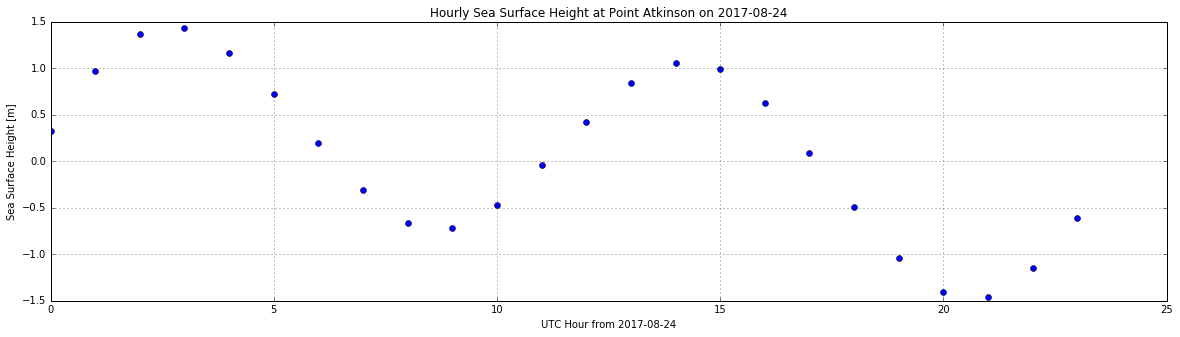

In [8]:
fig = figures.ssh_PtAtkinson(grid_T_hr)

## Website Figures ##

### Website Thumbnail ###

### Threshold Website ###

### PA Tidal Predictions ###

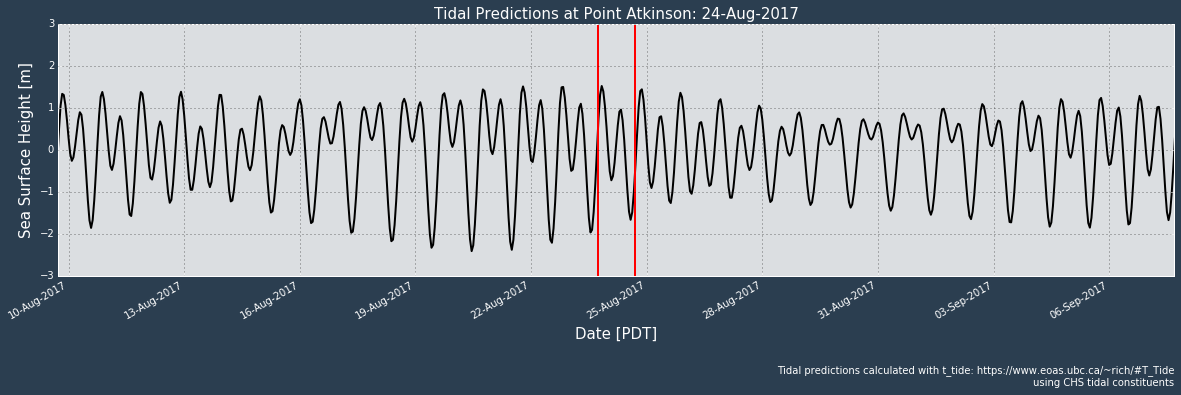

In [9]:
fig = pt_atkinson_tide.make_figure(grid_T_hr, tidal_predictions, timezone)

### Victoria, PA, Campbell River, Nanaimo, Cherry Point SSH ###

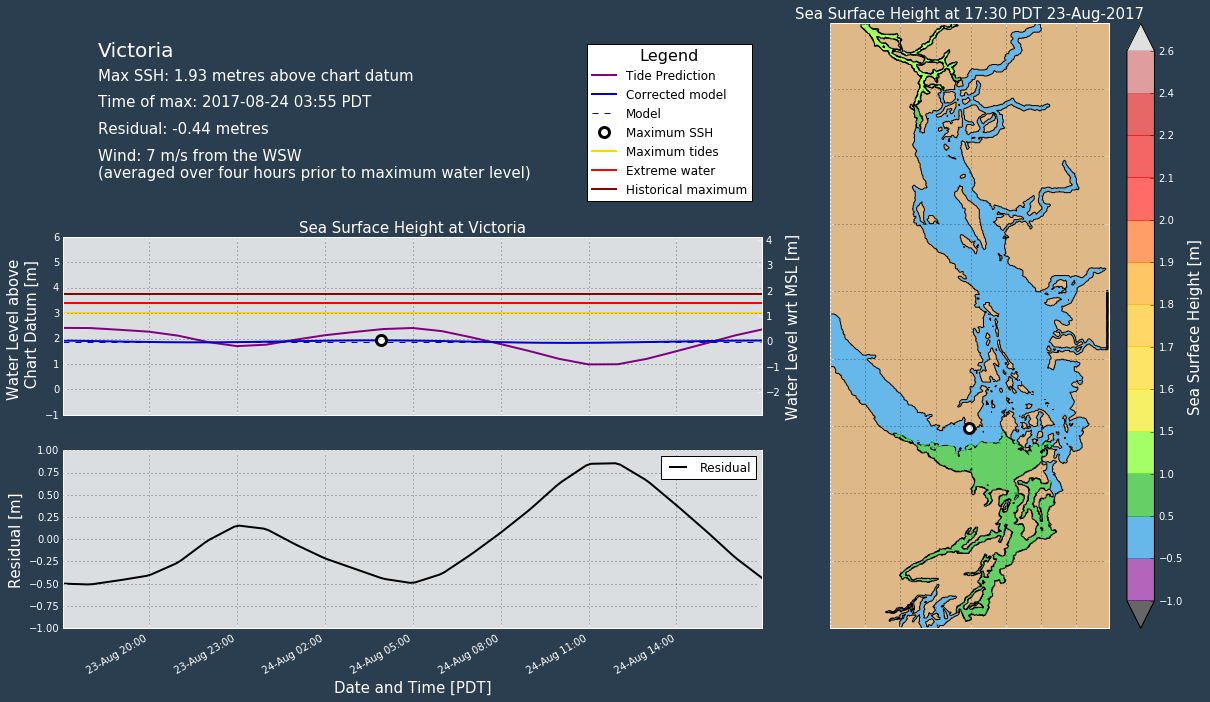

In [10]:
fig = compare_tide_prediction_max_ssh.make_figure('Victoria', grid_T_hr, grids_15m, bathy, weather_path, tidal_predictions,
                                                 timezone)

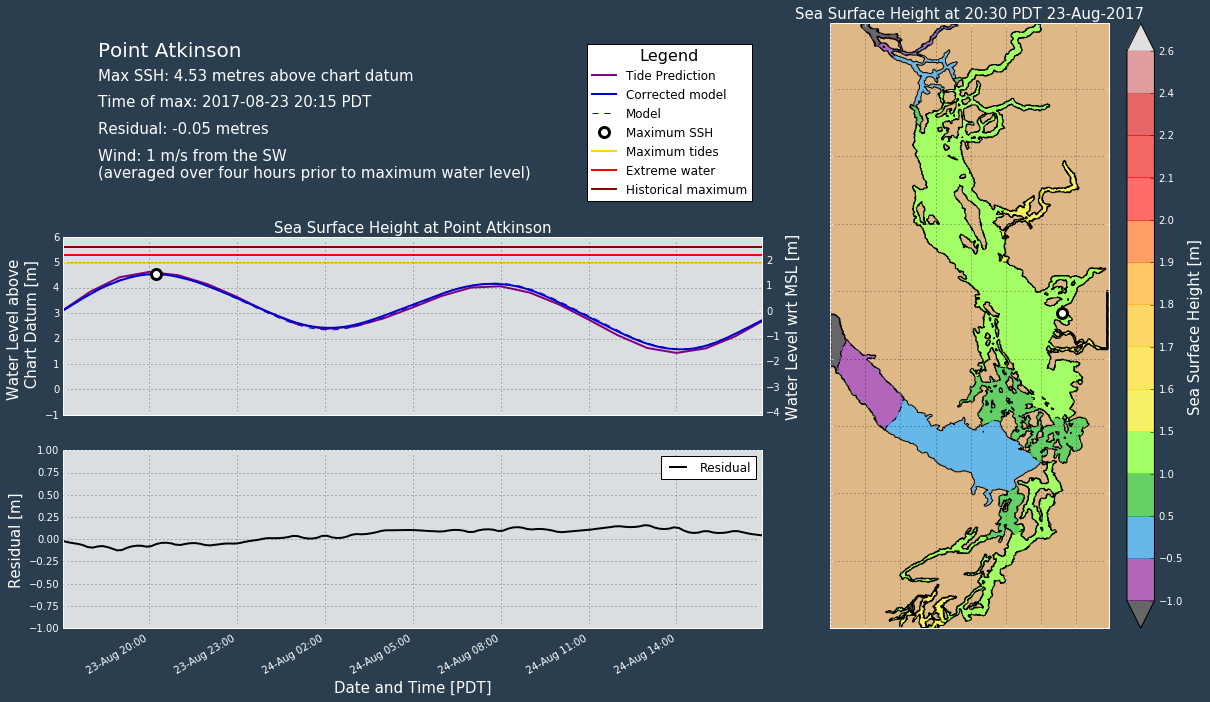

In [11]:
fig = compare_tide_prediction_max_ssh.make_figure('Point Atkinson', grid_T_hr, grids_15m, bathy, weather_path, tidal_predictions,
                                                 timezone)

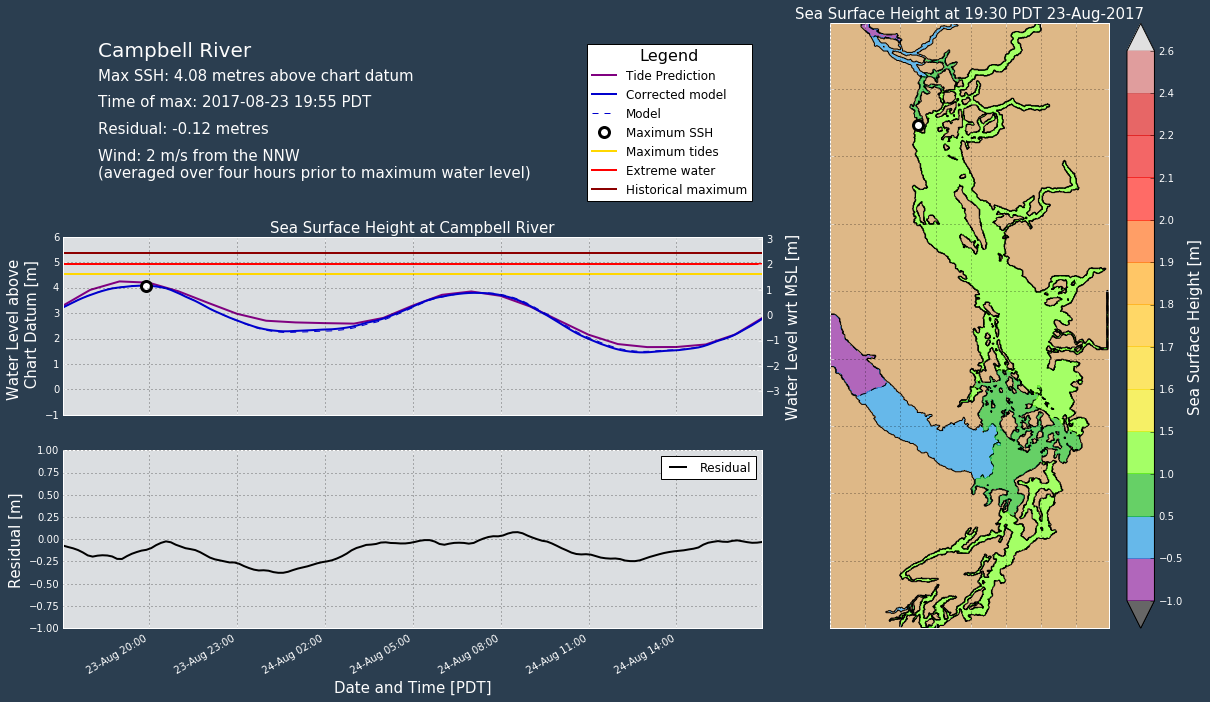

In [12]:
fig = compare_tide_prediction_max_ssh.make_figure('Campbell River', grid_T_hr, grids_15m, bathy, weather_path, tidal_predictions,
                                                 timezone)

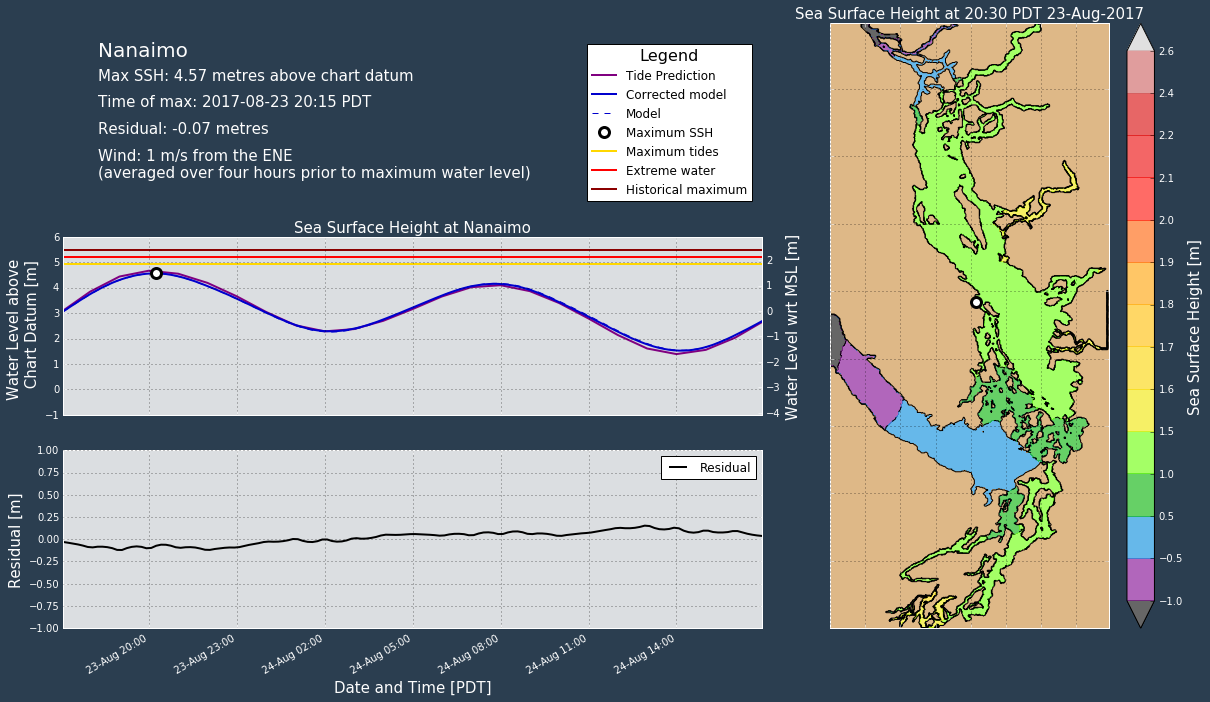

In [13]:
fig = compare_tide_prediction_max_ssh.make_figure('Nanaimo', grid_T_hr, grids_15m, bathy, weather_path, tidal_predictions,
                                                 timezone)

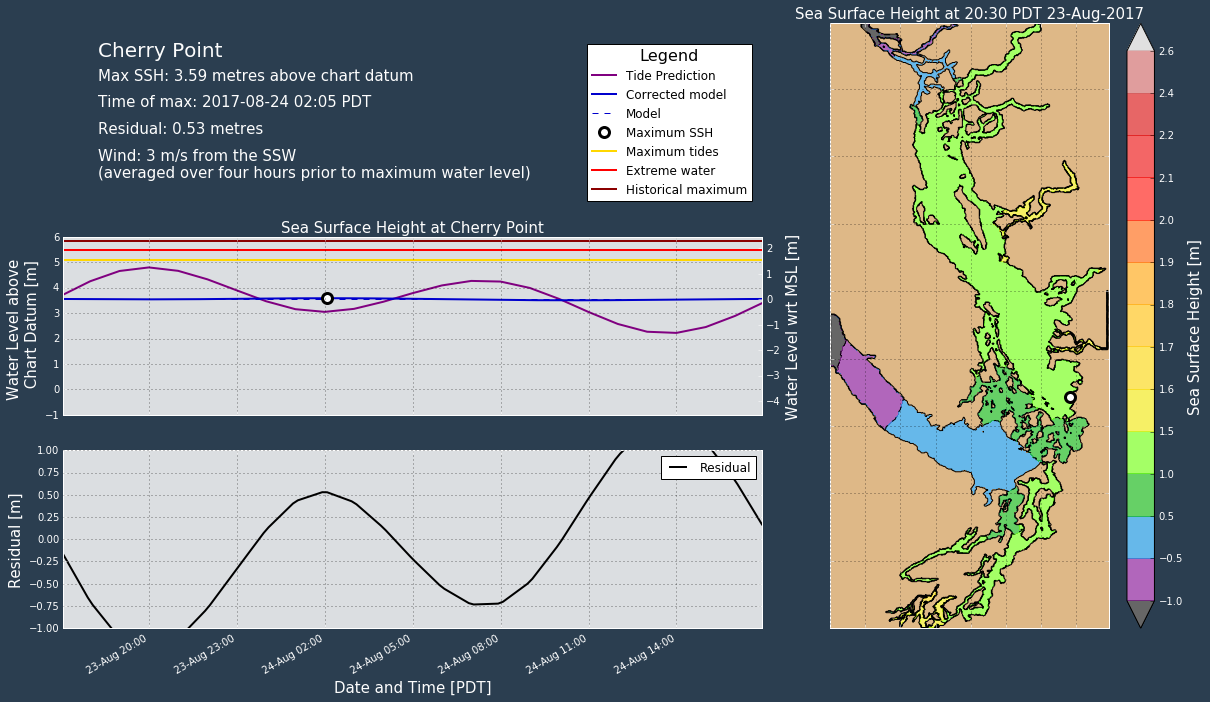

In [14]:
fig = compare_tide_prediction_max_ssh.make_figure('Cherry Point', grid_T_hr, grids_15m, bathy, weather_path, tidal_predictions,
                                                 timezone)

### NOAA ssh ###

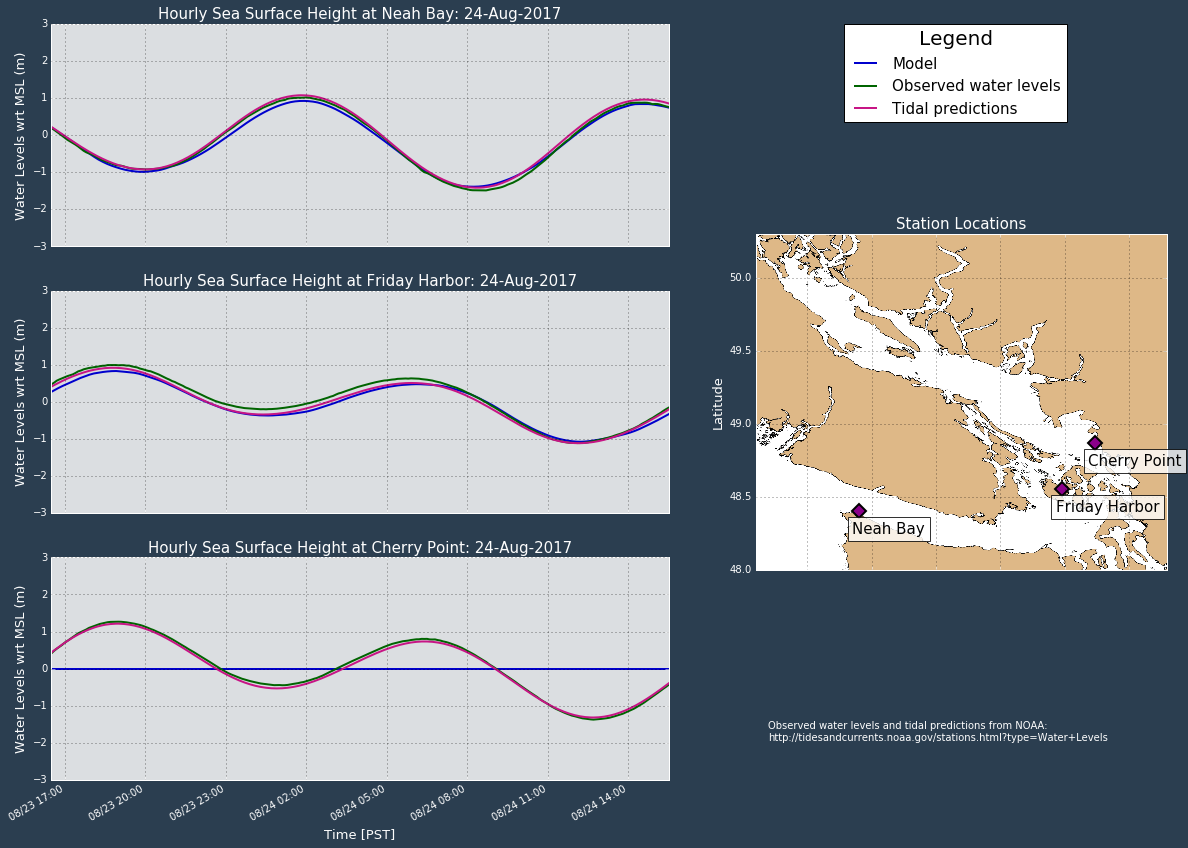

In [15]:
fig = figures.compare_water_levels(grid_T_hr, bathy, grids_15m, coastline)

In [16]:
fig = figures.PA_max_ssh(grid_T_hr,bathy)

AttributeError: module 'nowcast.figures.figures' has no attribute 'PA_max_ssh'

In [ ]:
fig = figures.Sandheads_winds(grid_T_hr)

In [ ]:
reload(figures)

In [ ]:
fig = figures.thalweg_salinity(grid_T_dy)

In [ ]:
fig = figures.plot_surface(grid_T_dy, grid_U_dy, grid_V_dy, bathy)